<a href="https://colab.research.google.com/github/bahti21/transcriptomika/blob/main/hometask3_new_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task1     Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described

Бимодальное распределение числа UMI на клетку часто связано с несколькими факторами:

1. Некоторые типы клеток могут иметь значительно больше транскриптов, чем другие.
2. Процессы обработки образцов могут влиять на количество обнаруженных UMI.

Анализ разнородности в данных:

1. "Comprehensive Integration of Single-Cell Data" (Nature Biotechnology)
2. "The impact of sequencing depth on single-cell RNA-seq analysis" (Nature Communications)

Task 2
Using Cellxgene Portal please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in loom format and describe the features of such a format.



Формат Loom используется для хранения больших объемов данных о генах и клетках.
Особенности:
1. Иерархическая структура для удобного доступа.
2. Поддержка хранения аннотаций.
3. Хорошая совместимость с Python через библиотеку loompy.

Шаги для проведения QC:
1. Загрузка данных.
2. Проверка основных метрик:
3. Количество генов на клетку.
4. Процент митохондриальных генов.
5. Фильтрация клеток на основе метрик.
6. Сохранение в формате Loom

In [ ]:
!pip install scanpy[leiden] scrublet
!gdown "1Ctq4EmV2ps1dMiFcbqW467ywezRSGGN0&confirm=t"
!unzip PBMC_10k.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.3 MB/s eta 0:00:00
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552451 sha256=e138df25612fa8b0ed8dee5369789a1844c605cf85a5b7dc0d97accfef2c8c2c
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
  Created

In [ ]:
import scanpy as sc
import seaborn as sns
import numpy as np

sc.settings.verbosity = 3

In [ ]:
!wget https://datasets.cellxgene.cziscience.com/f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad
adata = sc.read_h5ad('/content/f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad')
adata.var_names_make_unique()

--2024-07-14 17:35:11--  https://datasets.cellxgene.cziscience.com/f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 18.160.200.93, 18.160.200.112, 18.160.200.37, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|18.160.200.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 362766772 (346M) [binary/octet-stream]
Saving to: ‘f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad.1’

f8f41e86-e9ed-4de7- 100%[===================>] 345.96M   136MB/s    in 2.5s    

2024-07-14 17:35:14 (136 MB/s) - ‘f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad.1’ saved [362766772/362766772]



In [ ]:
print(adata.shape)
adata
print(adata.obs.cell_type)
adata.var
print(adata[adata.obs.cell_type == 'B cell'].shape)

(66985, 36263)
0002_AAACCCACAAGTCCCG-1                      CD4-positive, alpha-beta T cell
0002_AAACCCAGTAGTCGTT-1    CD16-positive, CD56-dim natural killer cell, h...
0002_AAACCCATCTACACAG-1                                       dendritic cell
0002_AAACGAAAGAATTTGG-1                      CD4-positive, alpha-beta T cell
0002_AAACGCTAGCGACTGA-1                               CD14-positive monocyte
                                                 ...                        
079_TTTGGAGTCAGAGTGG-1                                CD14-positive monocyte
079_TTTGGAGTCGACATAC-1                                CD14-positive monocyte
079_TTTGGTTAGGTTATAG-1     CD16-positive, CD56-dim natural killer cell, h...
079_TTTGGTTCACACCAGC-1                                   natural killer cell
079_TTTGTTGGTTGTTGCA-1                       CD4-positive, alpha-beta T cell
Name: cell_type, Length: 66985, dtype: category
Categories (9, object): ['platelet', 'B cell', 'dendritic cell', 'natural killer cell', ..

In [ ]:
adata = adata[adata.obs.cell_type == 'platelet']
adata.shape

(505, 36263)

In [ ]:
sc.pp.calculate_qc_metrics(
    adata,
    inplace=True,
    log1p=False,
    percent_top=None,
)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_qc.py:141: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


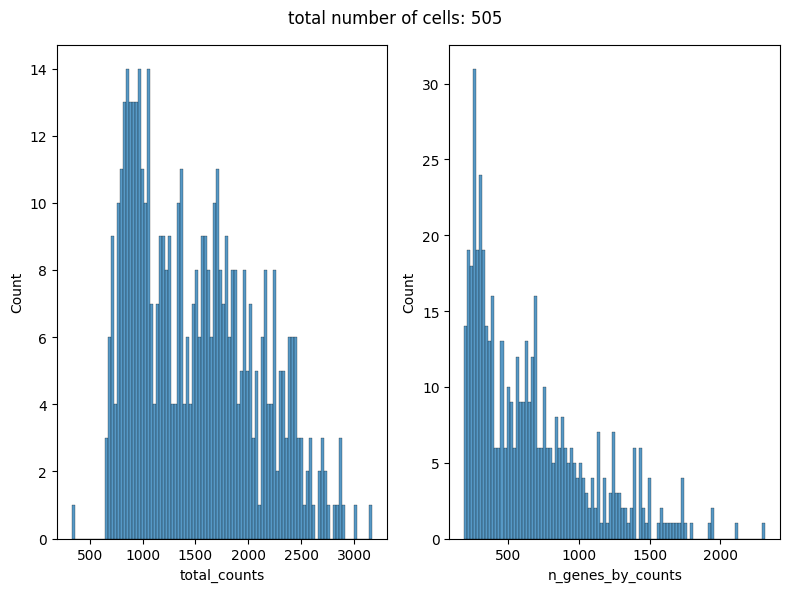

In [ ]:
import matplotlib.pyplot as plt

adata1 = adata[adata.obs.cell_type == 'platelet']
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 6))
sns.histplot(adata1.obs.total_counts, ax=axes[0], bins=100)
sns.histplot(adata1.obs.n_genes_by_counts, ax=axes[1], bins=100)

plt.suptitle(f"total number of cells: {len(adata1)}")

fig.tight_layout()

In [ ]:
sc.pp.scrublet(adata1)
print(adata1)

Running Scrublet
filtered out 26011 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:08)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
    using data matrix X directly
Automatically set threshold at doublet score = 0.26
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 2.5%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 0.0%
    Scrublet finished (0:00:13)
AnnData object with n_obs × n_vars = 505 × 36263
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification.global', 'sample', 'donor_id', 'CHIP', 'LANE', 'P

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_scrublet/__init__.py:289: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


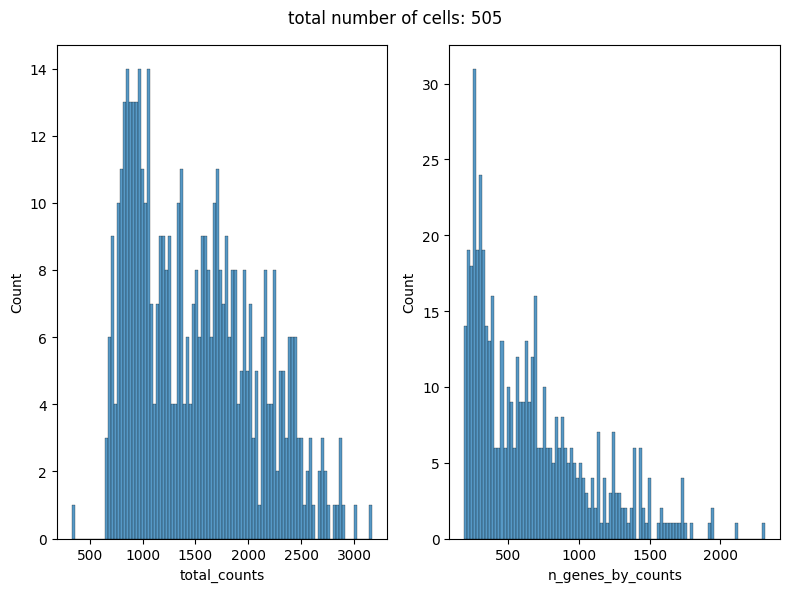

In [ ]:
adata1 = adata[adata.obs.cell_type == 'platelet']

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 6))

sns.histplot(adata1.obs.total_counts, ax=axes[0], bins=100)
sns.histplot(adata1.obs.n_genes_by_counts, ax=axes[1], bins=100)

plt.suptitle(f"total number of cells: {len(adata1)}")

fig.tight_layout()

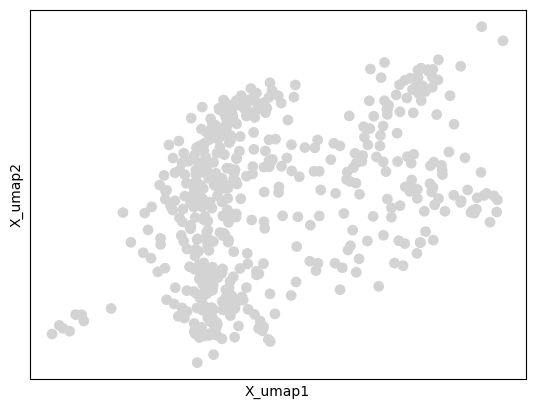

In [ ]:
sc.pl.embedding(adata1, basis="X_umap")

<Axes: ylabel='Count'>

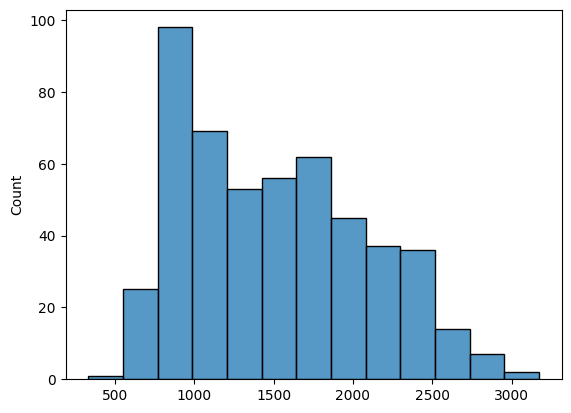

In [ ]:
counts_per_cell = adata1.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell)

In [ ]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.1 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=45eac0eb1aa3dd2be1b9167bae4c679abaa84c9a3bb4144882844b2055395ec7
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


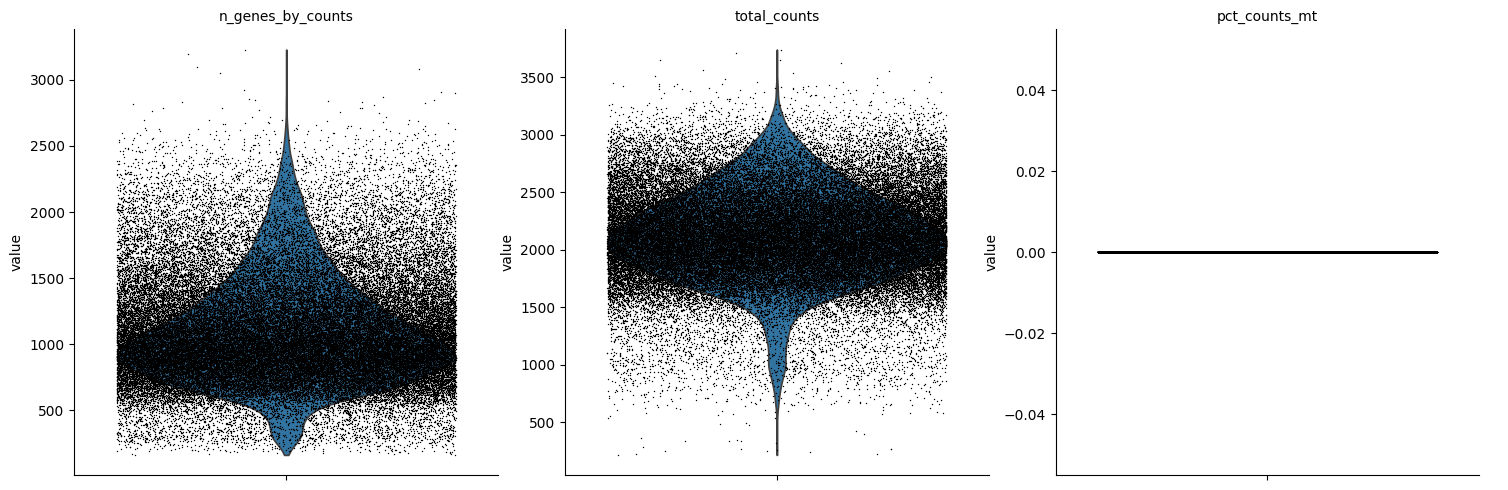

filtered out 41 cells that have less than 200 genes expressed
filtered out 170 cells that have more than 2500 genes expressed


The loom file will lack these fields:
{'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


ModuleNotFoundError: No module named 'loompy'

In [ ]:
import scanpy as sc

# Загрузка данных
adata = sc.read_h5ad('/content/f8f41e86-e9ed-4de7-a155-836b2f243fd0.h5ad')

# Вычисление метрик QC
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # Обозначение митохондриальных генов
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

# Визуализация метрик
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# Фильтрация клеток
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_cells(adata, max_genes=2500)
sc.pp.filter_cells(adata, max_counts=10000)
adata = adata[adata.obs['pct_counts_mt'] < 5]

# Сохранение в формате Loom
adata.write_loom('/content/f8f41e86-e9ed-4de7-a155-836b2f243fd0.loom')


print(description)